<a href="https://colab.research.google.com/github/JulianSchmidtke/CAPTUM/blob/main/AsuD_CAPTUM_v0.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JulianSchmidtke/CAPTUM.git

Cloning into 'CAPTUM'...
remote: Enumerating objects: 484, done.
remote: Counting objects: 100% (484/484), done.
remote: Compressing objects: 100% (461/461), done.
remote: Total 484 (delta 25), reused 463 (delta 20), pack-reused 0
Receiving objects: 100% (484/484), 5.21 MiB | 19.61 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk, os
import pandas as pd
import numpy as np

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
#Arbeitsverzeichnis auf das Ordnerverzeichnis ändern, in welchem die Daten liegen (txt-Format)

cwd = os.getcwd()
nwd = r'/content/CAPTUM/files'

os.chdir(nwd)

#Speichern der Dateinamen in einem Array
files = os.listdir()

In [11]:
#Zu Testzwecken werden lediglich die letzten 5 Dateien verwendet
#files = files[-5]
files

['CAPTUM_Allergic Diseases_Omalizumab_Miller 2008.pdf_out_text.txt',
 'CAPTUM_ASST\uf028_TPO_Chanprapaph 2018 .pdf_out_text.txt',
 'CAPTUM_Angioedema_Antihistamine_Büyüköztürk 2012.pdf_out_text.txt',
 'CAPTUM_Allergic Diseases_Duration_Karaayvaz 2002.pdf_out_text.txt',
 'CAPTUM_ASST\uf028_angioedema_Magen 2011.pdf_out_text.txt',
 'CAPTUM_BHRA_Angioedema_Swerdt 2005.pdf_out_text.txt',
 'CAPTUM_Severity_Omalizumab_Damiani 2018.pdf_out_text.txt',
 'CAPTUM_BHRA_Basophil_Eckman 2008.pdf_out_text.txt',
 'CAPTUM_BHRA_CRP_Tedeschi 2010.pdf_out_text.txt',
 'CAPTUM_Allergic Diseases_Omalizumab_Bae 2019.pdf_out_text.txt',
 'CAPTUM_Duration_Cyclosporine_Lee 2017 .pdf_out_text.txt',
 'CAPTUM_Eosinophil_Omalizumab_Ortega 2019.pdf_out_text.txt',
 'CAPTUM_Antihistamine_Omalizumab_Mellerowicz 2019.pdf_out_text.txt',
 'CAPTUM_TPO_Duration_Kumaran 2020.pdf_out_text.txt',
 'CAPTUM_Antihistamine_Omalizumab_Cherrez 2017.pdf_out_text.txt',
 'CAPTUM_CRP_D-Dimer_Asero 2020.pdf_out_text.txt',
 'CAPTUM_D-Dimer_A

In [12]:
fileNameTags = list(map(lambda fn: fn.split('_')[0:-2],files))
print(fileNameTags)

fileName = [fNT[-1] for fNT in fileNameTags]
fileTags = [fNT[1:-1] for fNT in fileNameTags]
fileYear = [fY[-8:-4] for fY in fileName]

print(fileName)
print(fileTags)
print(fileYear)

[['CAPTUM', 'Allergic Diseases', 'Omalizumab', 'Miller 2008.pdf'], ['CAPTUM', 'ASST\uf028', 'TPO', 'Chanprapaph 2018 .pdf'], ['CAPTUM', 'Angioedema', 'Antihistamine', 'Büyüköztürk 2012.pdf'], ['CAPTUM', 'Allergic Diseases', 'Duration', 'Karaayvaz 2002.pdf'], ['CAPTUM', 'ASST\uf028', 'angioedema', 'Magen 2011.pdf'], ['CAPTUM', 'BHRA', 'Angioedema', 'Swerdt 2005.pdf'], ['CAPTUM', 'Severity', 'Omalizumab', 'Damiani 2018.pdf'], ['CAPTUM', 'BHRA', 'Basophil', 'Eckman 2008.pdf'], ['CAPTUM', 'BHRA', 'CRP', 'Tedeschi 2010.pdf'], ['CAPTUM', 'Allergic Diseases', 'Omalizumab', 'Bae 2019.pdf'], ['CAPTUM', 'Duration', 'Cyclosporine', 'Lee 2017 .pdf'], ['CAPTUM', 'Eosinophil', 'Omalizumab', 'Ortega 2019.pdf'], ['CAPTUM', 'Antihistamine', 'Omalizumab', 'Mellerowicz 2019.pdf'], ['CAPTUM', 'TPO', 'Duration', 'Kumaran 2020.pdf'], ['CAPTUM', 'Antihistamine', 'Omalizumab', 'Cherrez 2017.pdf'], ['CAPTUM', 'CRP', 'D-Dimer', 'Asero 2020.pdf'], ['CAPTUM', 'D-Dimer', 'Allergic Diseases', 'Asero 2013.pdf'], ['C

In [13]:
#Einen leeren Pandas-Dataframe erstellen

df = pd.DataFrame(index=files)
print(df)

Empty DataFrame
Columns: []
Index: [CAPTUM_Allergic Diseases_Omalizumab_Miller 2008.pdf_out_text.txt, CAPTUM_ASST_TPO_Chanprapaph 2018 .pdf_out_text.txt, CAPTUM_Angioedema_Antihistamine_Büyüköztürk 2012.pdf_out_text.txt, CAPTUM_Allergic Diseases_Duration_Karaayvaz 2002.pdf_out_text.txt, CAPTUM_ASST_angioedema_Magen 2011.pdf_out_text.txt, CAPTUM_BHRA_Angioedema_Swerdt 2005.pdf_out_text.txt, CAPTUM_Severity_Omalizumab_Damiani 2018.pdf_out_text.txt, CAPTUM_BHRA_Basophil_Eckman 2008.pdf_out_text.txt, CAPTUM_BHRA_CRP_Tedeschi 2010.pdf_out_text.txt, CAPTUM_Allergic Diseases_Omalizumab_Bae 2019.pdf_out_text.txt, CAPTUM_Duration_Cyclosporine_Lee 2017 .pdf_out_text.txt, CAPTUM_Eosinophil_Omalizumab_Ortega 2019.pdf_out_text.txt, CAPTUM_Antihistamine_Omalizumab_Mellerowicz 2019.pdf_out_text.txt, CAPTUM_TPO_Duration_Kumaran 2020.pdf_out_text.txt, CAPTUM_Antihistamine_Omalizumab_Cherrez 2017.pdf_out_text.txt, CAPTUM_CRP_D-Dimer_Asero 2020.pdf_out_text.txt, CAPTUM_D-Dimer_Allergic Diseases_Asero 2

In [14]:
c = []
for file in files:
    f = open(file, "r", encoding = "ISO-8859-1")
    c.append(f.read())
    f.close

In [15]:
df['Name'] = fileName
df['Tags'] = fileTags
df['Year'] = fileYear
df['Content'] = c
df

,Name,Tags,Year,Content
CAPTUM_Allergic Diseases_Omalizumab_Miller 2008.pdf_out_text.txt,Miller 2008.pdf,"[Allergic Diseases, Omalizumab]",2008,Clinical and Molecular Allergy\n\nReview\n\nSe...
CAPTUM_ASST_TPO_Chanprapaph 2018 .pdf_out_text.txt,Chanprapaph 2018 .pdf,"[ASST, TPO]",018,Hindawi\n\nBioMed Research International\n\nVo...
CAPTUM_Angioedema_Antihistamine_Büyüköztürk 2012.pdf_out_text.txt,Büyüköztürk 2012.pdf,"[Angioedema, Antihistamine]",2012,JAPANESE\n\nDERMATOLOGICAL\nASSOCIATION\n\n \n...
CAPTUM_Allergic Diseases_Duration_Karaayvaz 2002.pdf_out_text.txt,Karaayvaz 2002.pdf,"[Allergic Diseases, Duration]",2002,Taylor & Francis\nFI] Taylor & Francis Group\n...
CAPTUM_ASST_angioedema_Magen 2011.pdf_out_text.txt,Magen 2011.pdf,"[ASST, angioedema]",2011,Clinical and laboratory features of antihistam...
...,...,...,...,...
CAPTUM_BAT_TPO_Sanchez 2019.pdf_out_text.txt,Sanchez 2019.pdf,"[BAT, TPO]",2019,Allergy Asthma Immunol Res. 2019 Jan;11(1):29-...
CAPTUM_Thyroglobulin_Omalizumab_Asero 2020.pdf_out_text.txt,Asero 2020.pdf,"[Thyroglobulin, Omalizumab]",2020,ical & Experimental Immunology\n\n \n\nelite l...
CAPTUM_Antihistamine_Omalizumab_Kaplan 2013.pdf_out_text.txt,Kaplan 2013.pdf,"[Antihistamine, Omalizumab]",2013,Atopic dermatitis and skin disease\n\nOmalizum...
CAPTUM_Allergic Diseases_Omalizumab_Crisafulli 2019.pdf_out_text.txt,Crisafulli 2019.pdf,"[Allergic Diseases, Omalizumab]",2019,Crisafulli et al. Italian Journal of Pediatric...


Es werden Füllwörter entfernt.

In [16]:
stop_words=set(stopwords.words("english"))
def stoppingFunc(text, stop_words=stop_words):
    filtered_text=[]
    for word in text:
        if len(word) < 3:
            next
        elif sum(c.isdigit() for c in word)>0:
            next
        elif word not in stop_words:
            filtered_text.append(word)
        
    return filtered_text

Wörter auf ihren Wortstamm reduzieren (cats -> cat, transportation -> transport)

In [17]:
def stemmingFunc(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in text]

Komplexere Version des Stemming. Wörter werden im Zusammenhang gesehen und reduziert. Verben werden auf den Infiitiv gesetzt usw.

In [18]:
def lemmatizingFunc(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

Ich glaube es sollte entweder eine Stemming oder eine Lemmatizing Funktion angewendet werden.

Ich glaube wir sollten erst Lemmatizen und dann Stopwords entfernen.

In [19]:
df['Content'] = df['Content'].apply(lambda text: nltk.word_tokenize(text))
df['Content'] = df['Content'].apply(stoppingFunc)
df['Content'] = df['Content'].apply(stemmingFunc)
df['Content'] = df['Content'].apply(lemmatizingFunc)

df['Corpus'] = [' '.join(x) for x in df['Content']]

In [20]:
df

,Name,Tags,Year,Content,Corpus
CAPTUM_Allergic Diseases_Omalizumab_Miller 2008.pdf_out_text.txt,Miller 2008.pdf,"[Allergic Diseases, Omalizumab]",2008,"[clinic, molecular, allergi, review, sever, as...",clinic molecular allergi review sever asthma o...
CAPTUM_ASST_TPO_Chanprapaph 2018 .pdf_out_text.txt,Chanprapaph 2018 .pdf,"[ASST, TPO]",018,"[hindawi, biom, research, intern, volum, artic...",hindawi biom research intern volum articl page...
CAPTUM_Angioedema_Antihistamine_Büyüköztürk 2012.pdf_out_text.txt,Büyüköztürk 2012.pdf,"[Angioedema, Antihistamine]",2012,"[japanes, dermatolog, associ, doi, origin, art...",japanes dermatolog associ doi origin articl jo...
CAPTUM_Allergic Diseases_Duration_Karaayvaz 2002.pdf_out_text.txt,Karaayvaz 2002.pdf,"[Allergic Diseases, Duration]",2002,"[taylor, franci, taylor, franci, group, journa...",taylor franci taylor franci group journal derm...
CAPTUM_ASST_angioedema_Magen 2011.pdf_out_text.txt,Magen 2011.pdf,"[ASST, angioedema]",2011,"[clinic, laboratori, featur, antihistamine-res...",clinic laboratori featur antihistamine-resist ...
...,...,...,...,...,...
CAPTUM_BAT_TPO_Sanchez 2019.pdf_out_text.txt,Sanchez 2019.pdf,"[BAT, TPO]",2019,"[allergi, asthma, immunol, re, jan, http, piss...",allergi asthma immunol re jan http pissn origi...
CAPTUM_Thyroglobulin_Omalizumab_Asero 2020.pdf_out_text.txt,Asero 2020.pdf,"[Thyroglobulin, Omalizumab]",2020,"[ical, experiment, immunolog, elit, leclrem, l...",ical experiment immunolog elit leclrem lela §o...
CAPTUM_Antihistamine_Omalizumab_Kaplan 2013.pdf_out_text.txt,Kaplan 2013.pdf,"[Antihistamine, Omalizumab]",2013,"[atop, dermat, skin, diseas, omalizumab, patie...",atop dermat skin diseas omalizumab patient sym...
CAPTUM_Allergic Diseases_Omalizumab_Crisafulli 2019.pdf_out_text.txt,Crisafulli 2019.pdf,"[Allergic Diseases, Omalizumab]",2019,"[crisa, italian, journal, pediatr, http, earch...",crisa italian journal pediatr http earch itali...


In [21]:
print('Tags:')
tags = {element for e in df['Tags'] for element in e}
print(*tags, sep="\n")

Tags:
anti-FcεRI
TPO
Eosinophil
serverity
cyclosporine
Thyroglobulin
IL-24
Total IgE
D-Dimer
Cyclosporine
duration
BHRA
Omalizumab
angioedema
Antihistamine
dsDNA
Eosinophil count
ANA
Basophil
Basophil count
ASST
anti-TPO IgE ratio
omalizumab
Tissue factor
Severity
BAT
thyroglobulin
CRP
Angioedema
Anti-IgE
Allergic Diseases
Ana
Duration


# Algorithmen anwenden

### TFIDF Vertorizer

In [ ]:
tfidfconvert = TfidfVectorizer(ngram_range=(1,3)).fit(df.Corpus.values)

In [ ]:
len(tfidfconvert.vocabulary_)

327937

In [ ]:
words_transformed = tfidfconvert.transform(df.Corpus.values)

### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

K-Means für mehrere k's berechnen

In [ ]:
Sum_of_squared_distances = []
max_range = 10
K = range(1,max_range + 1)
for k in K: 
    print(str(k) + "/" + str(max_range))
    km = KMeans(n_clusters=k)
    km = km.fit(words_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10


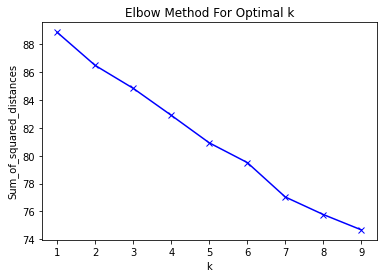

In [ ]:
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# 1: A comprehensive overview of the markers / features

Hier vorerst Marker und Features aus der Folie. Mehr kann durch Analyse der Texte oder dem Erstellen eines Dictionaries herausgefunden werden.

In [27]:
markers = ["Eosinopenia", "Basopenia", "IgT-anti-TPO", "CRP", "IgE"]
features = ["Activity", "Duration", "Comorbid autoimmune diseases", "Angioedema"]

def find_markers(text):
  found_markers = []
  for marker in markers:
    if marker.upper() in text.upper():
      found_markers.append(marker)
  return found_markers

def find_features(text):
  found_features = []
  for feature in features:
    if feature.upper() in text.upper():
      found_features.append(feature)
  return found_features

df['Markers'] = df['Corpus'].apply(find_markers)
df['Features'] = df['Corpus'].apply(find_features)
df

,Name,Tags,Year,Content,Corpus,Markers,Features
CAPTUM_Allergic Diseases_Omalizumab_Miller 2008.pdf_out_text.txt,Miller 2008.pdf,"[Allergic Diseases, Omalizumab]",2008,"[clinic, molecular, allergi, review, sever, as...",clinic molecular allergi review sever asthma o...,[IgE],[Angioedema]
CAPTUM_ASST_TPO_Chanprapaph 2018 .pdf_out_text.txt,Chanprapaph 2018 .pdf,"[ASST, TPO]",018,"[hindawi, biom, research, intern, volum, artic...",hindawi biom research intern volum articl page...,[IgE],[Angioedema]
CAPTUM_Angioedema_Antihistamine_Büyüköztürk 2012.pdf_out_text.txt,Büyüköztürk 2012.pdf,"[Angioedema, Antihistamine]",2012,"[japanes, dermatolog, associ, doi, origin, art...",japanes dermatolog associ doi origin articl jo...,[IgE],[Angioedema]
CAPTUM_Allergic Diseases_Duration_Karaayvaz 2002.pdf_out_text.txt,Karaayvaz 2002.pdf,"[Allergic Diseases, Duration]",2002,"[taylor, franci, taylor, franci, group, journa...",taylor franci taylor franci group journal derm...,"[CRP, IgE]",[Angioedema]
CAPTUM_ASST_angioedema_Magen 2011.pdf_out_text.txt,Magen 2011.pdf,"[ASST, angioedema]",2011,"[clinic, laboratori, featur, antihistamine-res...",clinic laboratori featur antihistamine-resist ...,"[Basopenia, CRP, IgE]","[Activity, Angioedema]"
...,...,...,...,...,...,...,...
CAPTUM_BAT_TPO_Sanchez 2019.pdf_out_text.txt,Sanchez 2019.pdf,"[BAT, TPO]",2019,"[allergi, asthma, immunol, re, jan, http, piss...",allergi asthma immunol re jan http pissn origi...,[IgE],[Angioedema]
CAPTUM_Thyroglobulin_Omalizumab_Asero 2020.pdf_out_text.txt,Asero 2020.pdf,"[Thyroglobulin, Omalizumab]",2020,"[ical, experiment, immunolog, elit, leclrem, l...",ical experiment immunolog elit leclrem lela §o...,[IgE],[Angioedema]
CAPTUM_Antihistamine_Omalizumab_Kaplan 2013.pdf_out_text.txt,Kaplan 2013.pdf,"[Antihistamine, Omalizumab]",2013,"[atop, dermat, skin, diseas, omalizumab, patie...",atop dermat skin diseas omalizumab patient sym...,"[Basopenia, IgE]",[Angioedema]
CAPTUM_Allergic Diseases_Omalizumab_Crisafulli 2019.pdf_out_text.txt,Crisafulli 2019.pdf,"[Allergic Diseases, Omalizumab]",2019,"[crisa, italian, journal, pediatr, http, earch...",crisa italian journal pediatr http earch itali...,[IgE],[Angioedema]


# 2: To understand how the markers/features of Type IIb aiCSU are linked


## How strong is the link between any two given markers? ​

Erste Definition Julian:
 $$link=\frac{AB}{\frac{A+B}{2}}$$


In [106]:
def str_contains(text, a, b):
  if a in text:
    if b in text:
      return True
  return False

def get_link(a, b):
  if a == b:
    return 1
  # count_a = df[df.Markers.str.join(',').str.contains(a)].Markers.count()
  # count_b = df[df.Markers.str.join(',').str.contains(b)].Markers.count()
  # count_ab = df[df.Markers.str.join(',').str.contains(b)].Markers.count()
  count_a = df[df.Markers.apply(str_contains, a=a, b=a)].Markers.count()
  count_b = df[df.Markers.apply(str_contains, a=b, b=b)].Markers.count()
  count_ab = df[df.Markers.apply(str_contains, a=a, b=b)].Markers.count()
  return (count_ab/(0.5*(count_a+count_b)))


link = get_link(markers[0], markers[1])
link
# df_x = df[df['Markers'].isin(['IgE'])]
# df_x
# df_x = df[all(x in  for x in [])]['Markers'].count()
# df_x = df.Markers.to_list()
# all(x in ['b', 'a', 'foo', 'bar'] for x in ['a', 'b'])

# all(x in ['b', 'a', 'foo', 'bar'] for x in ['a', 'b'])
# df_x


# df[str_contains(df.Markers.str.join(','), , )]

# df['Markers'].apply(str_contains, a = 'CRP', b='IgE')

0.31

In [130]:
# df_markers = pd.DataFrame()
# for marker_a in markers:
#   df_markers[marker_a] = []
#   #marker_links = []
#   for marker_b in markers:
#     df_markers = df_markers[marker_a].append(pd.Series(get_link(marker_a, marker_b)))
#   #df_markers.append(marker_links)
# df_markers

# mylist = []
# for marker in markers:
#   mylist.append(markers)

# mylist

# df_markers = pd.DataFrame(markers, columns=markers)
# df_markers


df_markers = pd.DataFrame(index=markers, columns=markers)
df_markers

for marker_a in markers:
  for marker_b in markers:
    df_markers[marker_a][marker_b] = get_link(marker_a, marker_b)

df_markers

,Eosinopenia,Basopenia,IgT-anti-TPO,CRP,IgE
Eosinopenia,1,0.31,0,0.176638,0.0685484
Basopenia,0.31,1,0,0.360248,0.295374
IgT-anti-TPO,0,0,1,0,0
CRP,0.176638,0.360248,0,1,0.456471
IgE,0.0685484,0.295374,0,0.456471,1


## Did the publication show a difference for marker a in patients stratified by marker b (and vice versa) and how big was the difference? ​

## Did the publication show a correlation between a and b and how strong was it? ​

## Was the result of a study that showed a link between a and b reproducible? ​


## How many studies confirmed the link? 

## How many studies failed to reproduce the link? ​

## How good is the quality of the study that demonstrates a link (how many patients?, how well characterized?, multicenter?, prospective vs retrospective, etc….)?